In [1]:
import rasterio
from rasterio.plot import show
from sklearn.cluster import KMeans, DBSCAN
import matplotlib.pyplot as plt
import numpy as np

C:\Users\Hacker\anaconda3\lib\site-packages\scipy\__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.4
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


In [2]:
image = rasterio.open('GRAY_HR_SR_OB.tif')

In [3]:
image.meta

{'driver': 'GTiff',
 'dtype': 'uint8',
 'nodata': None,
 'width': 21600,
 'height': 10800,
 'count': 1,
 'crs': CRS.from_epsg(4326),
 'transform': Affine(0.01666666666667, 0.0, -180.0,
        0.0, -0.01666666666667, 90.00000000000001)}

In [4]:
image_arr = image.read()

In [5]:
np.shape(image_arr)

(1, 10800, 21600)

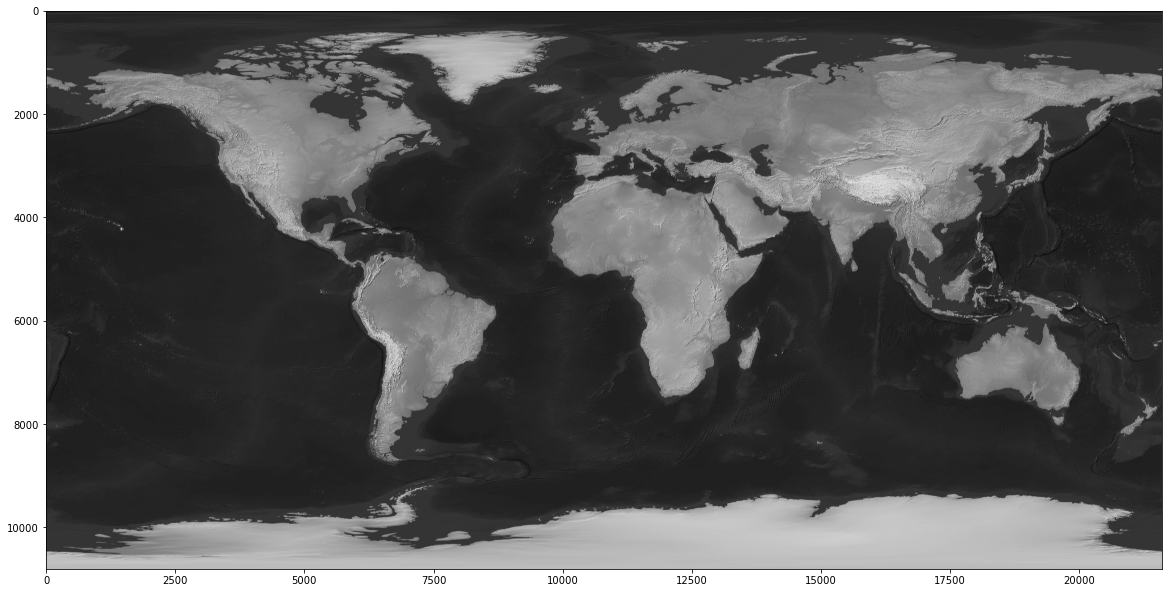

In [6]:
plt.figure(figsize=(20, 20))
show(image_arr, cmap='gray')
plt.show()

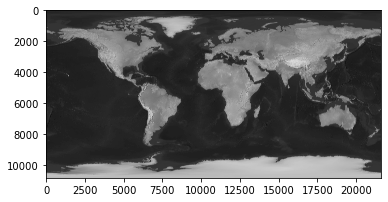

In [7]:
plt.imshow(image_arr[0], cmap='gray')

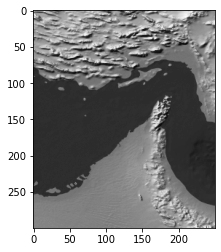

In [8]:
plt.imshow(image_arr[0][3000:4000, 13000:15000][700:, 1000:1250], cmap='gray')

In [9]:
hormoz_image = image_arr[0][3000:4000, 13000:15000][700:, 1000:1250]

In [10]:
np.shape(hormoz_image)

(300, 250)

In [11]:
# hormoz_cls = np.empty(np.shape(hormoz_image))

In [12]:
# hormoz_cls

In [13]:
# hormoz_flatten = hormoz_image.reshape(-1)

In [14]:
# hormoz_flatten.shape

In [15]:
from sklearn.feature_extraction import image

In [16]:
image.img_to_graph(hormoz_image).todense()

matrix([[214, 252,   0, ...,   0,   0,   0],
        [252, 218,   2, ...,   0,   0,   0],
        [  0,   2, 216, ...,   0,   0,   0],
        ...,
        [  0,   0,   0, ..., 149,  11,   0],
        [  0,   0,   0, ...,  11, 138, 237],
        [  0,   0,   0, ...,   0, 237, 157]], dtype=uint8)

In [17]:
# sample_image = [
#     [10, 20, 30, 30],
#     [20, 10, 30, 60],
#     [40, 100, 120, 250]
# ]
# image.img_to_graph(sample_image).todense()

In [18]:
cm = image.img_to_graph(hormoz_image)

In [19]:
kmeans = KMeans(n_clusters=2, max_iter=300, algorithm='elkan')
kmeans.fit(cm)

KMeans(algorithm='elkan', n_clusters=2)

In [20]:
labels = kmeans.labels_

In [21]:
np.unique(labels, return_counts=True)

(array([0, 1]), array([   10, 74990], dtype=int64))

In [22]:
labels_im = np.full(np.shape(hormoz_image), -1.)

In [23]:
labels_im

array([[-1., -1., -1., ..., -1., -1., -1.],
       [-1., -1., -1., ..., -1., -1., -1.],
       [-1., -1., -1., ..., -1., -1., -1.],
       ...,
       [-1., -1., -1., ..., -1., -1., -1.],
       [-1., -1., -1., ..., -1., -1., -1.],
       [-1., -1., -1., ..., -1., -1., -1.]])

In [24]:
hormoz_cls = hormoz_image.astype(bool)
labels_im[hormoz_cls] = labels

In [25]:
hormoz_cls

array([[ True,  True,  True, ...,  True,  True,  True],
       [ True,  True,  True, ...,  True,  True,  True],
       [ True,  True,  True, ...,  True,  True,  True],
       ...,
       [ True,  True,  True, ...,  True,  True,  True],
       [ True,  True,  True, ...,  True,  True,  True],
       [ True,  True,  True, ...,  True,  True,  True]])

In [26]:
labels_im

array([[1., 1., 1., ..., 1., 1., 1.],
       [1., 1., 1., ..., 1., 1., 1.],
       [1., 1., 1., ..., 1., 1., 1.],
       ...,
       [1., 1., 1., ..., 1., 1., 1.],
       [1., 1., 1., ..., 1., 1., 1.],
       [1., 1., 1., ..., 1., 1., 1.]])

In [27]:
hormoz_image

array([[214, 218, 216, ..., 159, 158, 159],
       [211, 206, 190, ..., 159, 159, 160],
       [194, 169, 135, ..., 160, 160, 160],
       ...,
       [156, 156, 156, ..., 168, 176, 151],
       [155, 155, 154, ..., 120, 150, 170],
       [154, 155, 153, ..., 149, 138, 157]], dtype=uint8)

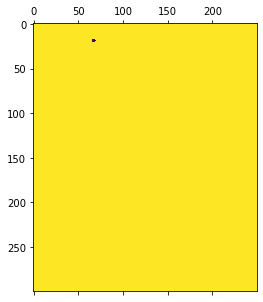

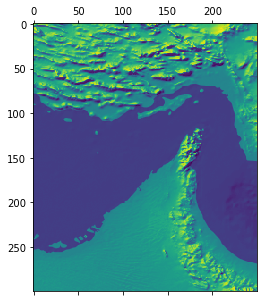

In [28]:
plt.matshow(labels_im)
plt.matshow(hormoz_image)

In [29]:
dbscan = DBSCAN()
dbscan.fit(cm)

DBSCAN()

In [31]:
labels = dbscan.labels_

In [32]:
np.unique(labels, return_counts=True)

(array([-1], dtype=int64), array([75000], dtype=int64))